In [47]:
#imoprt neccesary librarys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from glob import glob
from os.path import basename
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import torch
import cv2
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from torch import nn
#from nn import Conv2d
import sklearn
#from img2vec_pytorch import Img2Vec
import autokeras as ak


In [48]:
test_benign_path = r'.\Melanoma_cancer_data\test\Benign\*'
test_malignat_path = r'.\Melanoma_cancer_data\test\Malignant\*'
train_benign_path = r'.\Melanoma_cancer_data\train\Benign\*'
train_malignat_path = r'.\Melanoma_cancer_data\train\Malignant\*'

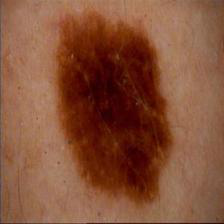

In [49]:
im_test_benign = Image.open(r'.\Melanoma_cancer_data\test\Benign\6299.jpg')
im_test_benign

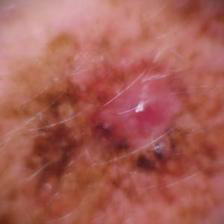

In [50]:
im_test_malignat = Image.open(r'C:\Users\Kacper\PycharmProjects\pythonProject1\Melanoma_cancer_data\test\Malignant\5602.jpg')
im_test_malignat

In [51]:
#function to get taged dataset in list
def get_dataset(path: str, tag: str) -> list:
    dataset = []
    for file in glob (pathname = path):
        file_name = basename(file)
        try:
            with Image.open(fp=file, mode='r') as image:
                vector = cv2.imread(file)
                dataset.append(pd.Series(data=[tag, file_name, vector], index=['tag', 'name', 'value']))
        except RuntimeError:

            pass
    return dataset

In [52]:
benign_train_set = get_dataset(path=train_benign_path, tag='benign')
malignat_train_set = get_dataset(path=train_malignat_path, tag='malignat')

In [53]:
train_set = pd.DataFrame(data=benign_train_set + malignat_train_set)

In [54]:
train_set.head(5)

,tag,name,value
0,benign,1.jpg,"[[[144, 140, 181], [153, 149, 190], [154, 150,..."
1,benign,10.jpg,"[[[156, 138, 231], [157, 139, 232], [158, 140,..."
2,benign,100.jpg,"[[[138, 126, 144], [145, 133, 151], [149, 137,..."
3,benign,1000.jpg,"[[[174, 150, 238], [174, 150, 238], [173, 149,..."
4,benign,1001.jpg,"[[[142, 122, 211], [144, 124, 213], [145, 125,..."


In [55]:
train_set['tag'].value_counts()

benign      6289
malignat    5590
Name: tag, dtype: int64

In [56]:
#changing str to num values
y_ohe = []
for i in train_set['tag']:
    if i == 'benign':
        y_ohe.append(0)
    else:
        y_ohe.append(1)
y_ohe = np.array(y_ohe)
y_ohe

array([0, 0, 0, ..., 1, 1, 1])

In [57]:
X_corected =  np.stack(train_set['value'].to_numpy())/255

In [58]:
#creating train and val set (80:20) with fixed
X_train, X_val, y_train, y_val = train_test_split(X_corected, y_ohe, test_size=0.2, random_state=68)

In [59]:
benign_test_set = get_dataset(path=train_benign_path, tag='benign')
malignat_test_set = get_dataset(path=train_malignat_path, tag='malignat')
test_set = pd.DataFrame(data=benign_train_set + malignat_train_set)
test_set.head(5)

,tag,name,value
0,benign,1.jpg,"[[[144, 140, 181], [153, 149, 190], [154, 150,..."
1,benign,10.jpg,"[[[156, 138, 231], [157, 139, 232], [158, 140,..."
2,benign,100.jpg,"[[[138, 126, 144], [145, 133, 151], [149, 137,..."
3,benign,1000.jpg,"[[[174, 150, 238], [174, 150, 238], [173, 149,..."
4,benign,1001.jpg,"[[[142, 122, 211], [144, 124, 213], [145, 125,..."


In [60]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(8,(3,3), activation='relu',input_shape=(224, 224,3)),
            tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
            tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(2, activation='softmax')])
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [61]:
epochs=10
batch_size=64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/10
149/149 [==============================] - 100s 652ms/step - loss: 1.6315 - accuracy: 0.7057 - val_loss: 0.5376 - val_accuracy: 0.7584
Epoch 2/10
149/149 [==============================] - 94s 630ms/step - loss: 0.4589 - accuracy: 0.7901 - val_loss: 0.4401 - val_accuracy: 0.7984
Epoch 3/10
149/149 [==============================] - 94s 633ms/step - loss: 0.3954 - accuracy: 0.8177 - val_loss: 0.3935 - val_accuracy: 0.8220
Epoch 4/10
149/149 [==============================] - 94s 635ms/step - loss: 0.3799 - accuracy: 0.8259 - val_loss: 0.4619 - val_accuracy: 0.8194
Epoch 5/10
149/149 [==============================] - 94s 632ms/step - loss: 0.3752 - accuracy: 0.8373 - val_loss: 0.3923 - val_accuracy: 0.8363
Epoch 6/10
149/149 [==============================] - 94s 633ms/step - loss: 0.3045 - accuracy: 0.8670 - val_loss: 0.4607 - val_accuracy: 0.8413
Epoch 7/10
149/149 [==============================] - 94s 628ms/step - loss: 0.2459 - accuracy: 0.8961 - val_loss: 0.4678 - val_a

In [ ]:
clf = ak.ImageClassifier(overwrite=True, max_trials=10)
clf.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

297/297 [==============================] - 906s 3s/step - loss: 0.3123 - accuracy: 0.8598 - val_loss: 0.2898 - val_accuracy: 0.8826
Epoch 8/1000
297/297 [==============================] - 903s 3s/step - loss: 0.3123 - accuracy: 0.8614 - val_loss: 0.2898 - val_accuracy: 0.8817
Epoch 9/1000
297/297 [==============================] - 903s 3s/step - loss: 0.3024 - accuracy: 0.8689 - val_loss: 0.3161 - val_accuracy: 0.8687
Epoch 10/1000
297/297 [==============================] - 904s 3s/step - loss: 0.2986 - accuracy: 0.8679 - val_loss: 0.2885 - val_accuracy: 0.8859
Epoch 11/1000
297/297 [==============================] - 900s 3s/step - loss: 0.2965 - accuracy: 0.8689 - val_loss: 0.3091 - val_accuracy: 0.8670
Epoch 12/1000
297/297 [==============================] - 901s 3s/step - loss: 0.2893 - accuracy: 0.8732 - val_loss: 0.3039 - val_accuracy: 0.8796
Epoch 13/1000
297/297 [==============================] - 903s 3s/step - loss: 0.2844 - accuracy: 0.8760 - val_loss: 0.2666 - val_accuracy: 0